# Assignment 1 - Machine Learning (INFO 7390) Review
## Machine Learning Review

### Objective 

To find a public dataset or machine learning competition and use machine learning techniques to analyze the data.

### Dataset Selected

For this assignment, I have selected Kaggle ML and Data Science Survey of 2017 dataset.

The dataset can be found in the below link [Kaggle ML and Data Science Survey, 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

Kaggle conducted an industry-wide survey to establish a comprehensive view of the state of data science and machine learning. The survey received over 16,000 responses and they learned a ton about who is working with data, what’s happening at the cutting edge of machine learning across industries, and how new data scientists can best break into the field.

### Machine Learning study


<p>From the survey data collected by Kaggle, We are going to determine the Tenure/Work experience of a Kaggle user. We are going to use the following columns to determine the experience:</p>

<ol>
	<li>GenderSelect</li>
	<li>Country</li>
	<li>Age</li>
	<li>EmploymentStatus</li>
	<li>CodeWriter</li>
	<li>CurrentJobTitleSelect</li>
	<li>MLToolNextYearSelect</li>
	<li>MLMethodNextYearSelect</li>
	<li>LanguageRecommendationSelect</li>
	<li>FormalEducation</li>
	<li>MajorSelect</li>
	<li>Tenure</li>
	<li>FirstTrainingSelect</li>
	<li>LearningCategorySelftTaught</li>
	<li>LearningCategoryOnlineCourses</li>
	<li>LearningCategoryWork</li>
	<li>LearningCategoryUniversity</li>
	<li>LearningCategoryKaggle</li>
	<li>LearningCategoryOther</li>
</ol>


## Part A - Get Some Data

To analyse the data, first we will import the dataset to the notebook

In [464]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import sklearn

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

response=pd.read_csv('./kaggle_ds_survey.csv',encoding='ISO-8859-1', low_memory=False)
response.head()

GenderSelect        Country   Age  \
0  Non-binary, genderqueer, or gender non-conforming            NaN   NaN   
1                                             Female  United States  30.0   
2                                               Male         Canada  28.0   
3                                               Male  United States  56.0   
4                                               Male         Taiwan  38.0   

                                    EmploymentStatus StudentStatus  \
0                                 Employed full-time           NaN   
1                 Not employed, but looking for work           NaN   
2                 Not employed, but looking for work           NaN   
3  Independent contractor, freelancer, or self-em...           NaN   
4                                 Employed full-time           NaN   

  LearningDataScience CodeWriter CareerSwitcher  \
0                 NaN        Yes            NaN   
1                 NaN        NaN            NaN   
2                 NaN        NaN            NaN   
3                 NaN        Yes            NaN   
4                 NaN        Yes            NaN   

              CurrentJobTitleSelect TitleFit              ...                \
0             DBA/Database Engineer     Fine              ...                 
1                               NaN      NaN              ...                 
2                               NaN      NaN              ...                 
3  Operations Research Practitioner   Poorly              ...                 
4                Computer Scientist     Fine              ...                 

  JobFactorExperienceLevel JobFactorDepartment  JobFactorTitle  \
0                      NaN                 NaN             NaN   
1                      NaN                 NaN             NaN   
2           Very Important      Very Important  Very Important   
3                      NaN                 NaN             NaN   
4                      NaN                 NaN             NaN   

  JobFactorCompanyFunding JobFactorImpact JobFactorRemote JobFactorIndustry  \
0                     NaN             NaN             NaN               NaN   
1                     NaN             NaN             NaN               NaN   
2          Very Important  Very Important  Very Important    Very Important   
3                     NaN             NaN             NaN               NaN   
4                     NaN             NaN             NaN               NaN   

  JobFactorLeaderReputation JobFactorDiversity JobFactorPublishingOpportunity  
0                       NaN                NaN                            NaN  
1        Somewhat important                NaN                            NaN  
2            Very Important     Very Important                 Very Important  
3                       NaN                NaN                            NaN  
4                       NaN                NaN                            NaN  

[5 rows x 228 columns]

In [465]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


In [466]:
print('The total number of respondents:',response.shape[0])
print('Total number of Countries with respondents:',response['Country'].nunique())
print('Country with highest respondents:',response['Country'].value_counts().index[0],'with',response['Country'].value_counts().values[0],'respondents')
print('Youngest respondent:',response['Age'].min(),' and Oldest respondent:',response['Age'].max())

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States with 4197 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


### Data cleaning

#### Remove or impute any bad data.

<p style="color:blue">Before we begin the Exploratory data analysis (EDA), we will first select the required column for the data frame</p>


In [467]:
response = response[['GenderSelect','Country','Age','EmploymentStatus','CodeWriter','CurrentJobTitleSelect','MLToolNextYearSelect','MLMethodNextYearSelect','LanguageRecommendationSelect','FormalEducation','MajorSelect','Tenure','FirstTrainingSelect','LearningCategorySelftTaught','LearningCategoryOnlineCourses','LearningCategoryWork','LearningCategoryUniversity','LearningCategoryKaggle','LearningCategoryOther']]
response.info()
reponse_1 = response

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 19 columns):
GenderSelect                     16621 non-null object
Country                          16595 non-null object
Age                              16385 non-null float64
EmploymentStatus                 16716 non-null object
CodeWriter                       13186 non-null object
CurrentJobTitleSelect            11830 non-null object
MLToolNextYearSelect             10998 non-null object
MLMethodNextYearSelect           10833 non-null object
LanguageRecommendationSelect     10998 non-null object
FormalEducation                  15015 non-null object
MajorSelect                      13281 non-null object
Tenure                           13532 non-null object
FirstTrainingSelect              14712 non-null object
LearningCategorySelftTaught      13109 non-null float64
LearningCategoryOnlineCourses    13126 non-null float64
LearningCategoryWork             13111 non-null float64
Learnin

#### Are there missing values? (10 %)


In [468]:
response.isnull().sum()

GenderSelect                       95
Country                           121
Age                               331
EmploymentStatus                    0
CodeWriter                       3530
CurrentJobTitleSelect            4886
MLToolNextYearSelect             5718
MLMethodNextYearSelect           5883
LanguageRecommendationSelect     5718
FormalEducation                  1701
MajorSelect                      3435
Tenure                           3184
FirstTrainingSelect              2004
LearningCategorySelftTaught      3607
LearningCategoryOnlineCourses    3590
LearningCategoryWork             3605
LearningCategoryUniversity       3594
LearningCategoryKaggle           3590
LearningCategoryOther            3622
dtype: int64

<p style="background:yellow">From the above calculations, we can clearly say that there is alot of null/empty columns in the given data set</p>

So before we try to learn more about or data set, lets first clean all the null values of the dataframe

In [469]:
response = response.dropna()
response.isnull().sum()

GenderSelect                     0
Country                          0
Age                              0
EmploymentStatus                 0
CodeWriter                       0
CurrentJobTitleSelect            0
MLToolNextYearSelect             0
MLMethodNextYearSelect           0
LanguageRecommendationSelect     0
FormalEducation                  0
MajorSelect                      0
Tenure                           0
FirstTrainingSelect              0
LearningCategorySelftTaught      0
LearningCategoryOnlineCourses    0
LearningCategoryWork             0
LearningCategoryUniversity       0
LearningCategoryKaggle           0
LearningCategoryOther            0
dtype: int64

In [470]:
response.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 3 to 16712
Data columns (total 19 columns):
GenderSelect                     6894 non-null object
Country                          6894 non-null object
Age                              6894 non-null float64
EmploymentStatus                 6894 non-null object
CodeWriter                       6894 non-null object
CurrentJobTitleSelect            6894 non-null object
MLToolNextYearSelect             6894 non-null object
MLMethodNextYearSelect           6894 non-null object
LanguageRecommendationSelect     6894 non-null object
FormalEducation                  6894 non-null object
MajorSelect                      6894 non-null object
Tenure                           6894 non-null object
FirstTrainingSelect              6894 non-null object
LearningCategorySelftTaught      6894 non-null float64
LearningCategoryOnlineCourses    6894 non-null float64
LearningCategoryWork             6894 non-null float64
LearningCategoryUniversi

In [471]:
print('The total number of respondents:',response.shape[0])
print('Total number of Countries with respondents:',response['Country'].nunique())
print('Country with highest respondents:',response['Country'].value_counts().index[0],'with',response['Country'].value_counts().values[0],'respondents')
print('Youngest respondent:',response['Age'].min(),' and Oldest respondent:',response['Age'].max())

The total number of respondents: 6894
Total number of Countries with respondents: 52
Country with highest respondents: United States with 1852 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


<p style="background-color:yellow">We can now observe that our dataframe is cleansed of null or empty values from the column we require. We have now 6894 rows out of 16716 total response</p> 

Now we can proceed with exploring our data

### Exploring the data

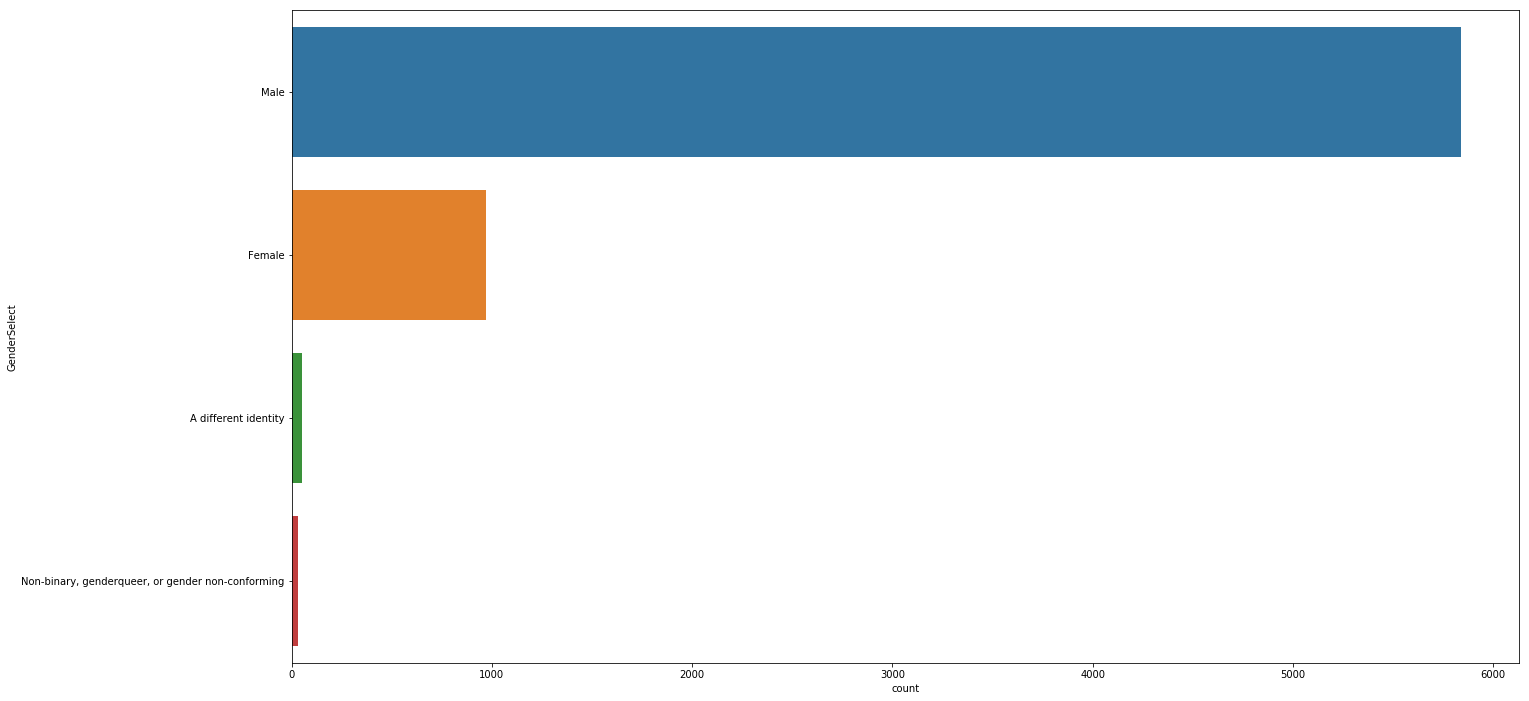

In [472]:
plt.subplots(figsize=(22,12))
sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
plt.show()

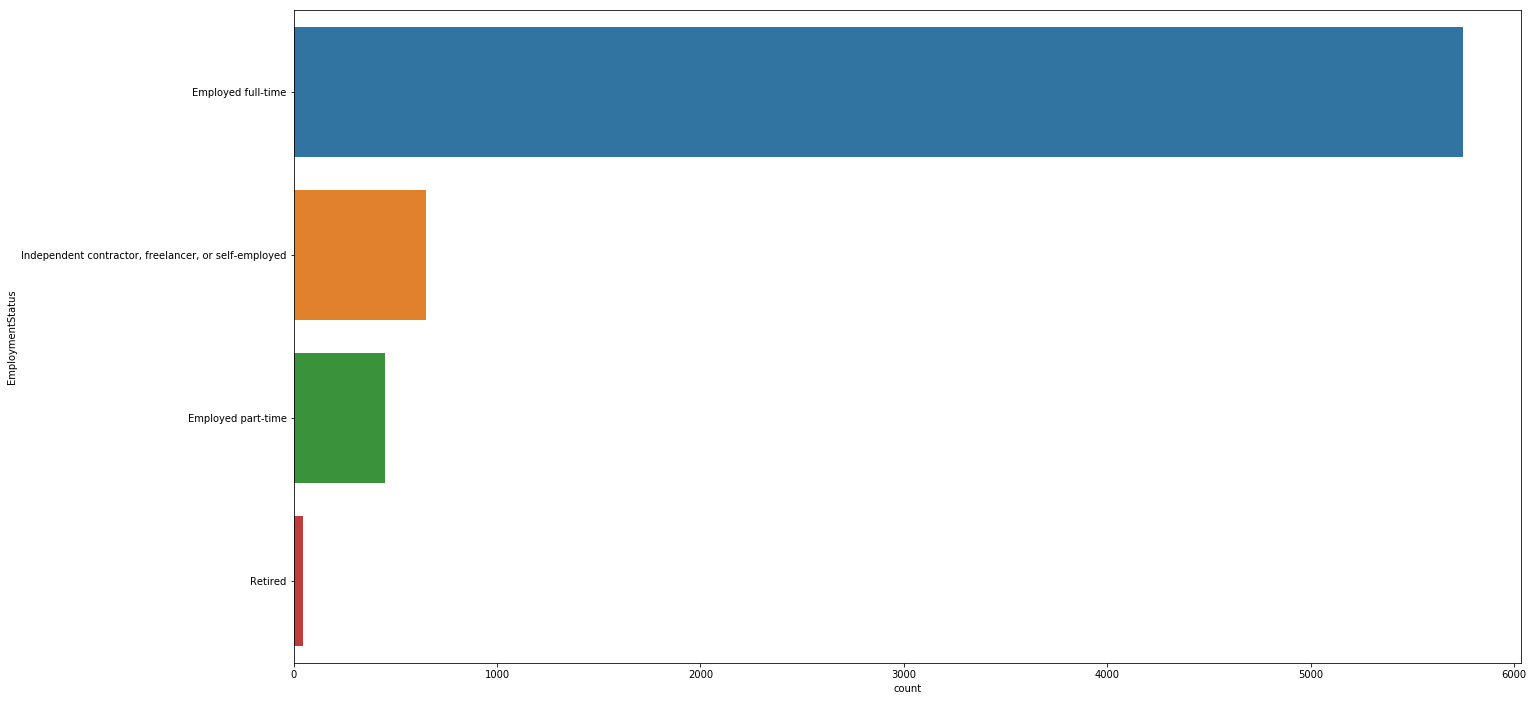

In [473]:
plt.subplots(figsize=(22,12))
sns.countplot(y=response['EmploymentStatus'],order=response['EmploymentStatus'].value_counts().index)
plt.show()

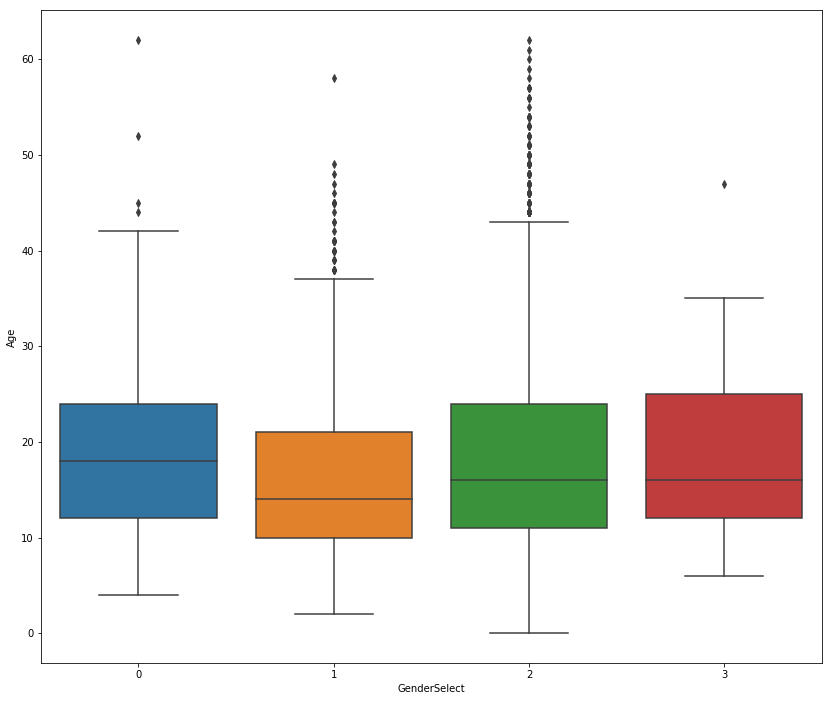

In [509]:
plt.figure(figsize=(14,12))
sns.boxplot(x='GenderSelect', y='Age', data=response);

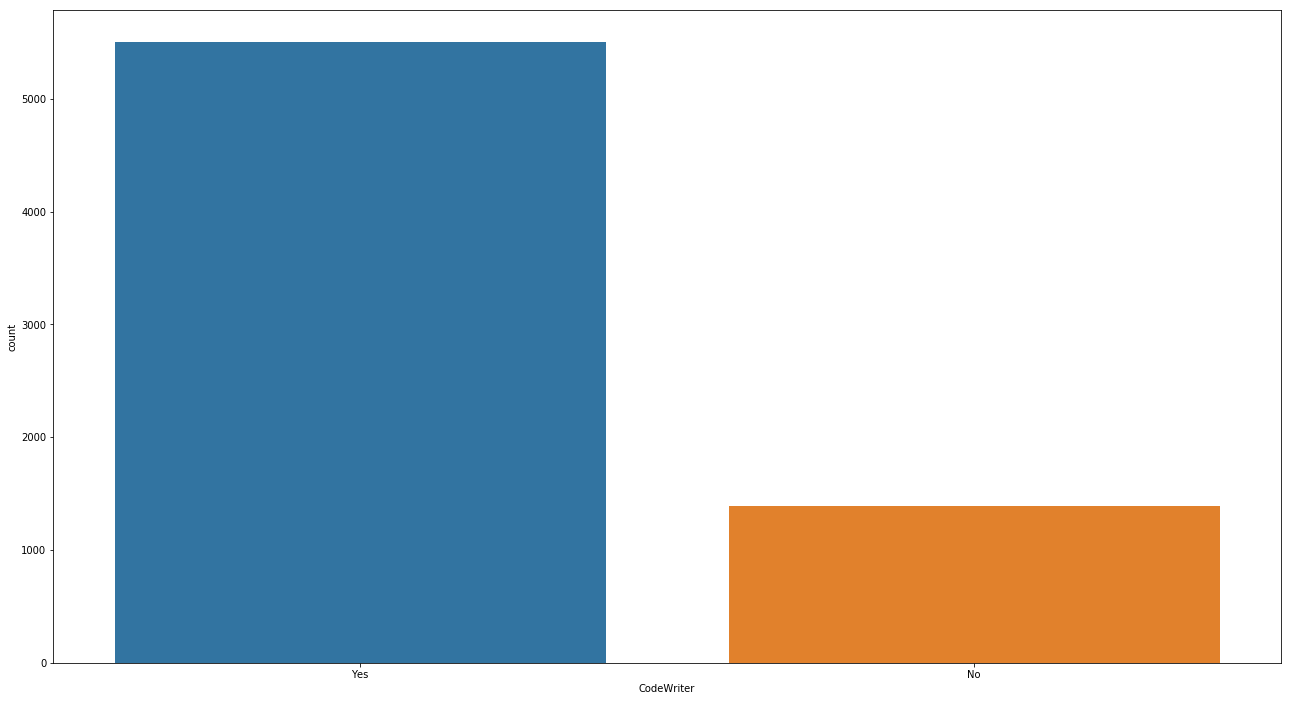

In [474]:
plt.subplots(figsize=(22,12))
sns.countplot(x=response['CodeWriter'],order=response['CodeWriter'].value_counts().index)
plt.show()

### Are there inappropraite values? (10 %)

In [475]:
print('Youngest respondent:',response['Age'].min(),' and Oldest respondent:',response['Age'].max())

Youngest respondent: 0.0  and Oldest respondent: 100.0


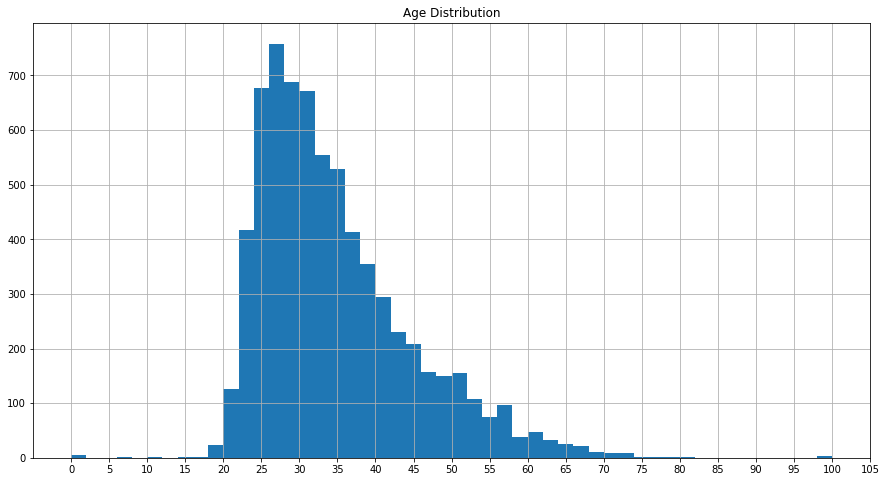

In [476]:
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50)
plt.xticks(list(range(0,110,5)))
plt.title('Age Distribution')
plt.show()

It is not possible to have Kaggle Data science users with the age either 0 or 100. So to make this data appropriate, I have chosen that all the user below the age of 15 and the age above 85 is invalid data.

In [477]:
response = response.loc[(response['Age'] >15) & (response['Age']<85)]
response.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6883 entries, 3 to 16712
Data columns (total 19 columns):
GenderSelect                     6883 non-null object
Country                          6883 non-null object
Age                              6883 non-null float64
EmploymentStatus                 6883 non-null object
CodeWriter                       6883 non-null object
CurrentJobTitleSelect            6883 non-null object
MLToolNextYearSelect             6883 non-null object
MLMethodNextYearSelect           6883 non-null object
LanguageRecommendationSelect     6883 non-null object
FormalEducation                  6883 non-null object
MajorSelect                      6883 non-null object
Tenure                           6883 non-null object
FirstTrainingSelect              6883 non-null object
LearningCategorySelftTaught      6883 non-null float64
LearningCategoryOnlineCourses    6883 non-null float64
LearningCategoryWork             6883 non-null float64
LearningCategoryUniversi

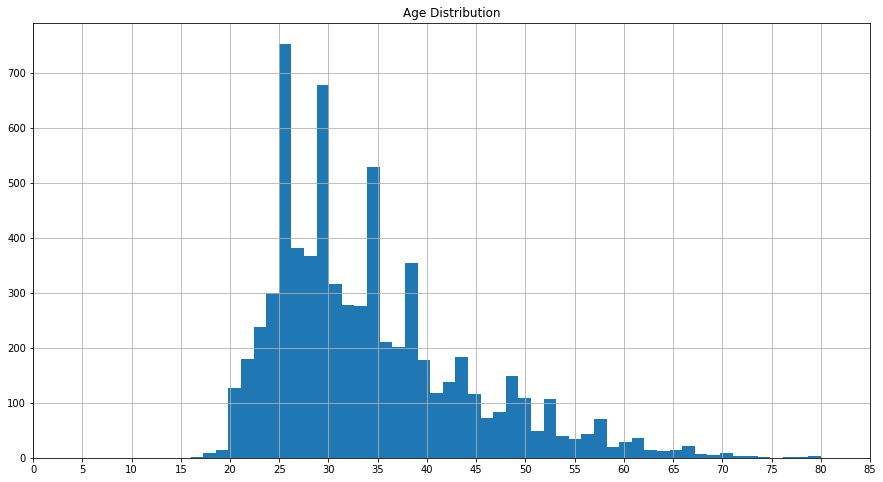

In [478]:
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50)
plt.xticks(list(range(0,90,5)))
plt.title('Age Distribution')
plt.show() 

In [479]:
response.describe()

Age  LearningCategorySelftTaught  \
count  6883.000000                  6883.000000   
mean     34.175795                    33.255848   
std       9.870546                    25.254476   
min      16.000000                     0.000000   
25%      27.000000                    15.000000   
50%      32.000000                    30.000000   
75%      39.000000                    50.000000   
max      80.000000                   100.000000   

       LearningCategoryOnlineCourses  LearningCategoryWork  \
count                    6883.000000           6883.000000   
mean                       26.457141             16.679045   
std                        26.096310             19.285703   
min                         0.000000              0.000000   
25%                         5.000000              0.000000   
50%                        20.000000             10.000000   
75%                        40.000000             30.000000   
max                       100.000000            100.000000   

       LearningCategoryUniversity  LearningCategoryKaggle  \
count                 6883.000000             6883.000000   
mean                    16.469999                5.504068   
std                     22.719447               10.683210   
min                      0.000000                0.000000   
25%                      0.000000                0.000000   
50%                      5.000000                0.000000   
75%                     30.000000               10.000000   
max                    100.000000              100.000000   

       LearningCategoryOther  
count            6883.000000  
mean                1.633900  
std                 8.757833  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max               100.000000

Next we are going to make all the category type values to the data format of category in the dataframe

In [480]:
col = ['GenderSelect','Country','Age','EmploymentStatus','CodeWriter','CurrentJobTitleSelect','MLToolNextYearSelect','MLMethodNextYearSelect','LanguageRecommendationSelect','FormalEducation','MajorSelect','Tenure','FirstTrainingSelect']
response_new = response
for i in col:
    response_new[i] = response_new[i].astype('category')
    
response_new.head()

GenderSelect        Country   Age  \
3         Male  United States  56.0   
4         Male         Taiwan  38.0   
5         Male         Brazil  46.0   
6         Male  United States  35.0   
7       Female          India  22.0   

                                    EmploymentStatus CodeWriter  \
3  Independent contractor, freelancer, or self-em...        Yes   
4                                 Employed full-time        Yes   
5                                 Employed full-time        Yes   
6                                 Employed full-time        Yes   
7                                 Employed full-time         No   

                  CurrentJobTitleSelect  MLToolNextYearSelect  \
3      Operations Research Practitioner            TensorFlow   
4                    Computer Scientist            TensorFlow   
5                        Data Scientist            TensorFlow   
6                    Computer Scientist            TensorFlow   
7  Software Developer/Software Engineer  Google Cloud Compute   

              MLMethodNextYearSelect LanguageRecommendationSelect  \
3                        Neural Nets                       Python   
4                        Text Mining                       Python   
5  Genetic & Evolutionary Algorithms                       Python   
6                        Text Mining                            R   
7                      Deep learning                          SQL   

     FormalEducation                         MajorSelect              Tenure  \
3    Master's degree           Mathematics or statistics  More than 10 years   
4    Doctoral degree  Engineering (non-computer focused)  More than 10 years   
5    Doctoral degree              Electrical Engineering       6 to 10 years   
6    Master's degree              Electrical Engineering  More than 10 years   
7  Bachelor's degree                    Computer Science        1 to 2 years   

                           FirstTrainingSelect  LearningCategorySelftTaught  \
3                           University courses                         30.0   
4                           University courses                         60.0   
5  Online courses (coursera, udemy, edx, etc.)                         45.0   
6                           University courses                         40.0   
7                           University courses                          0.0   

   LearningCategoryOnlineCourses  LearningCategoryWork  \
3                            0.0                  40.0   
4                            5.0                   5.0   
5                           25.0                  20.0   
6                            0.0                   0.0   
7                           40.0                   0.0   

   LearningCategoryUniversity  LearningCategoryKaggle  LearningCategoryOther  
3                        30.0                     0.0                    0.0  
4                        30.0                     0.0                    0.0  
5                         0.0                    10.0                    0.0  
6                        50.0                    10.0                    0.0  
7                        50.0                    10.0                    0.0

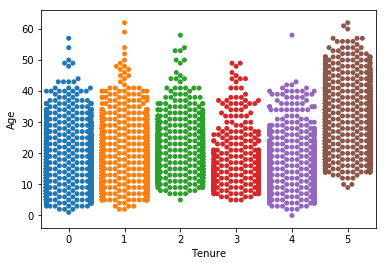

In [511]:
sns.swarmplot(x='Tenure', y='Age', data=response_new);

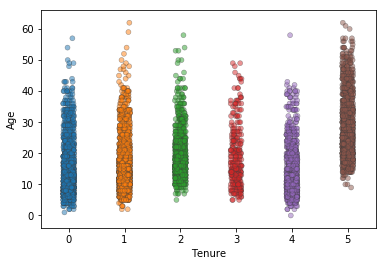

In [512]:
sns.stripplot(x='Tenure', y='Age', data=response_new, jitter=True, alpha=0.5, linewidth=0.5);

### Understanding Each column

In [481]:
response.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6883 entries, 3 to 16712
Data columns (total 19 columns):
GenderSelect                     6883 non-null category
Country                          6883 non-null category
Age                              6883 non-null category
EmploymentStatus                 6883 non-null category
CodeWriter                       6883 non-null category
CurrentJobTitleSelect            6883 non-null category
MLToolNextYearSelect             6883 non-null category
MLMethodNextYearSelect           6883 non-null category
LanguageRecommendationSelect     6883 non-null category
FormalEducation                  6883 non-null category
MajorSelect                      6883 non-null category
Tenure                           6883 non-null category
FirstTrainingSelect              6883 non-null category
LearningCategorySelftTaught      6883 non-null float64
LearningCategoryOnlineCourses    6883 non-null float64
LearningCategoryWork             6883 non-null float64

#### How is the data distributed?

In [482]:
response.describe()

LearningCategorySelftTaught  LearningCategoryOnlineCourses  \
count                  6883.000000                    6883.000000   
mean                     33.255848                      26.457141   
std                      25.254476                      26.096310   
min                       0.000000                       0.000000   
25%                      15.000000                       5.000000   
50%                      30.000000                      20.000000   
75%                      50.000000                      40.000000   
max                     100.000000                     100.000000   

       LearningCategoryWork  LearningCategoryUniversity  \
count           6883.000000                 6883.000000   
mean              16.679045                   16.469999   
std               19.285703                   22.719447   
min                0.000000                    0.000000   
25%                0.000000                    0.000000   
50%               10.000000                    5.000000   
75%               30.000000                   30.000000   
max              100.000000                  100.000000   

       LearningCategoryKaggle  LearningCategoryOther  
count             6883.000000            6883.000000  
mean                 5.504068               1.633900  
std                 10.683210               8.757833  
min                  0.000000               0.000000  
25%                  0.000000               0.000000  
50%                  0.000000               0.000000  
75%                 10.000000               0.000000  
max                100.000000             100.000000

#### What are the summary statistics?

In [483]:
response.describe(exclude=[np.number])

GenderSelect        Country     Age    EmploymentStatus CodeWriter  \
count          6883           6883  6883.0                6883       6883   
unique            4             52    63.0                   4          2   
top            Male  United States    27.0  Employed full-time        Yes   
freq           5832           1847   382.0                5740       5500   

       CurrentJobTitleSelect MLToolNextYearSelect MLMethodNextYearSelect  \
count                   6883                 6883                   6883   
unique                    16                   51                     25   
top           Data Scientist           TensorFlow          Deep learning   
freq                    1575                 1782                   2820   

       LanguageRecommendationSelect  FormalEducation       MajorSelect  \
count                          6883             6883              6883   
unique                           13                5                15   
top                          Python  Master's degree  Computer Science   
freq                           4358             3197              2040   

              Tenure                          FirstTrainingSelect  
count           6883                                         6883  
unique             6                                            6  
top     3 to 5 years  Online courses (coursera, udemy, edx, etc.)  
freq            1791                                         2423

In [484]:
for i in col:
    print(i)
    print(response_new[i].unique())
    print("")

GenderSelect
[Male, Female, A different identity, Non-binary, genderqueer, or gender non-conforming]
Categories (4, object): [Male, Female, A different identity, Non-binary, genderqueer, or gender non-conforming]

Country
[United States, Taiwan, Brazil, India, Russia, ..., Republic of China, Israel, Greece, Norway, Egypt]
Length: 52
Categories (52, object): [United States, Taiwan, Brazil, India, ..., Israel, Greece, Norway, Egypt]

Age
[56.0, 38.0, 46.0, 35.0, 22.0, ..., 77.0, 17.0, 79.0, 78.0, 71.0]
Length: 63
Categories (63, float64): [56.0, 38.0, 46.0, 35.0, ..., 17.0, 79.0, 78.0, 71.0]

EmploymentStatus
[Independent contractor, freelancer, or self-em..., Employed full-time, Employed part-time, Retired]
Categories (4, object): [Independent contractor, freelancer, or self-em..., Employed full-time, Employed part-time, Retired]

CodeWriter
[Yes, No]
Categories (2, object): [Yes, No]

CurrentJobTitleSelect
[Operations Research Practitioner, Computer Scientist, Data Scientist, Software 

Form the above 2 columns we can understand the category destirbution and the range in age and learning hours column

#### Are there anomalies/outliers?

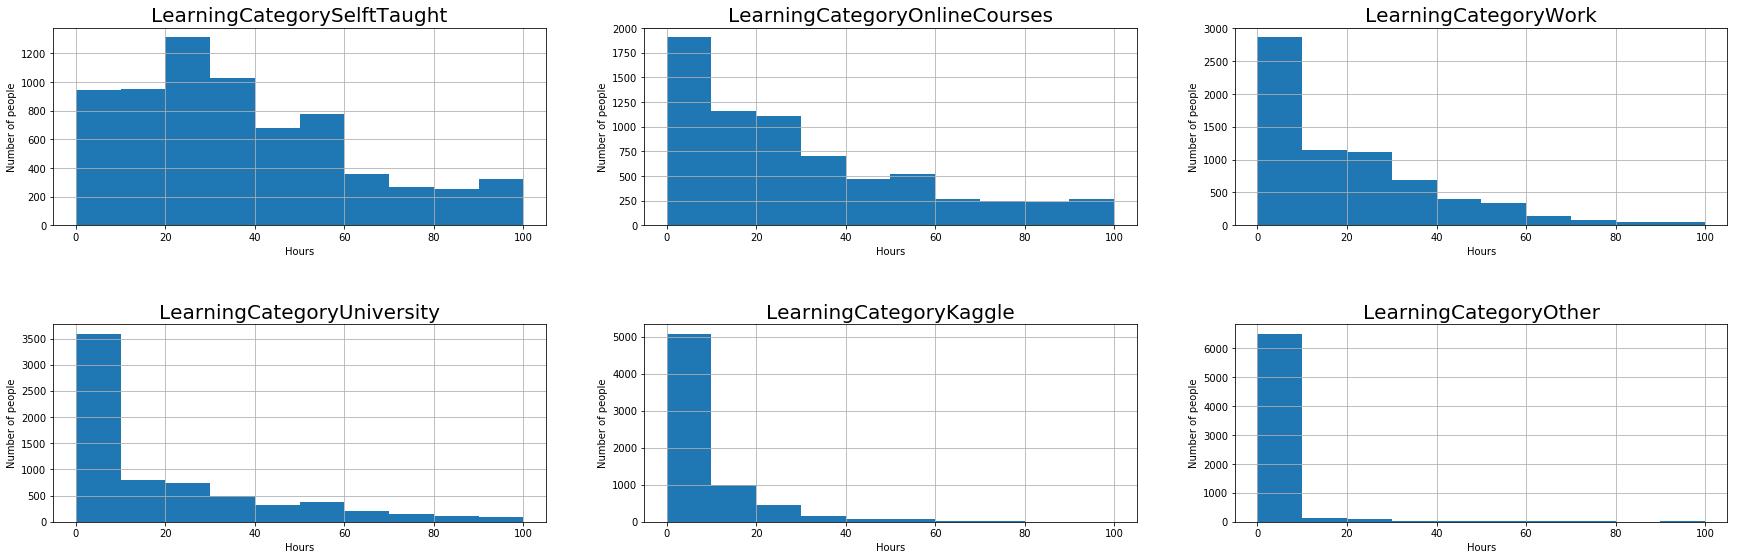

In [485]:
import itertools
Learningtype=["LearningCategorySelftTaught","LearningCategoryOnlineCourses","LearningCategoryWork","LearningCategoryUniversity","LearningCategoryKaggle","LearningCategoryOther"]
['WorkToolsFrequencyAmazonML','WorkToolsFrequencyAWS','WorkToolsFrequencyCloudera','WorkToolsFrequencyHadoop','WorkToolsFrequencyAzure']
plt.subplots(figsize=(30,20))
length=len(cloud)
for i,j in itertools.zip_longest(Learningtype,range(length)):
    plt.subplot((length/2+1),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    response_new[i].hist()
    plt.title(i,size=20)
    plt.ylabel('Number of people')
    plt.xlabel('Hours')
plt.show()

We observe that there are no more outlier in the data set taken.

### Are any of the columns correlated?

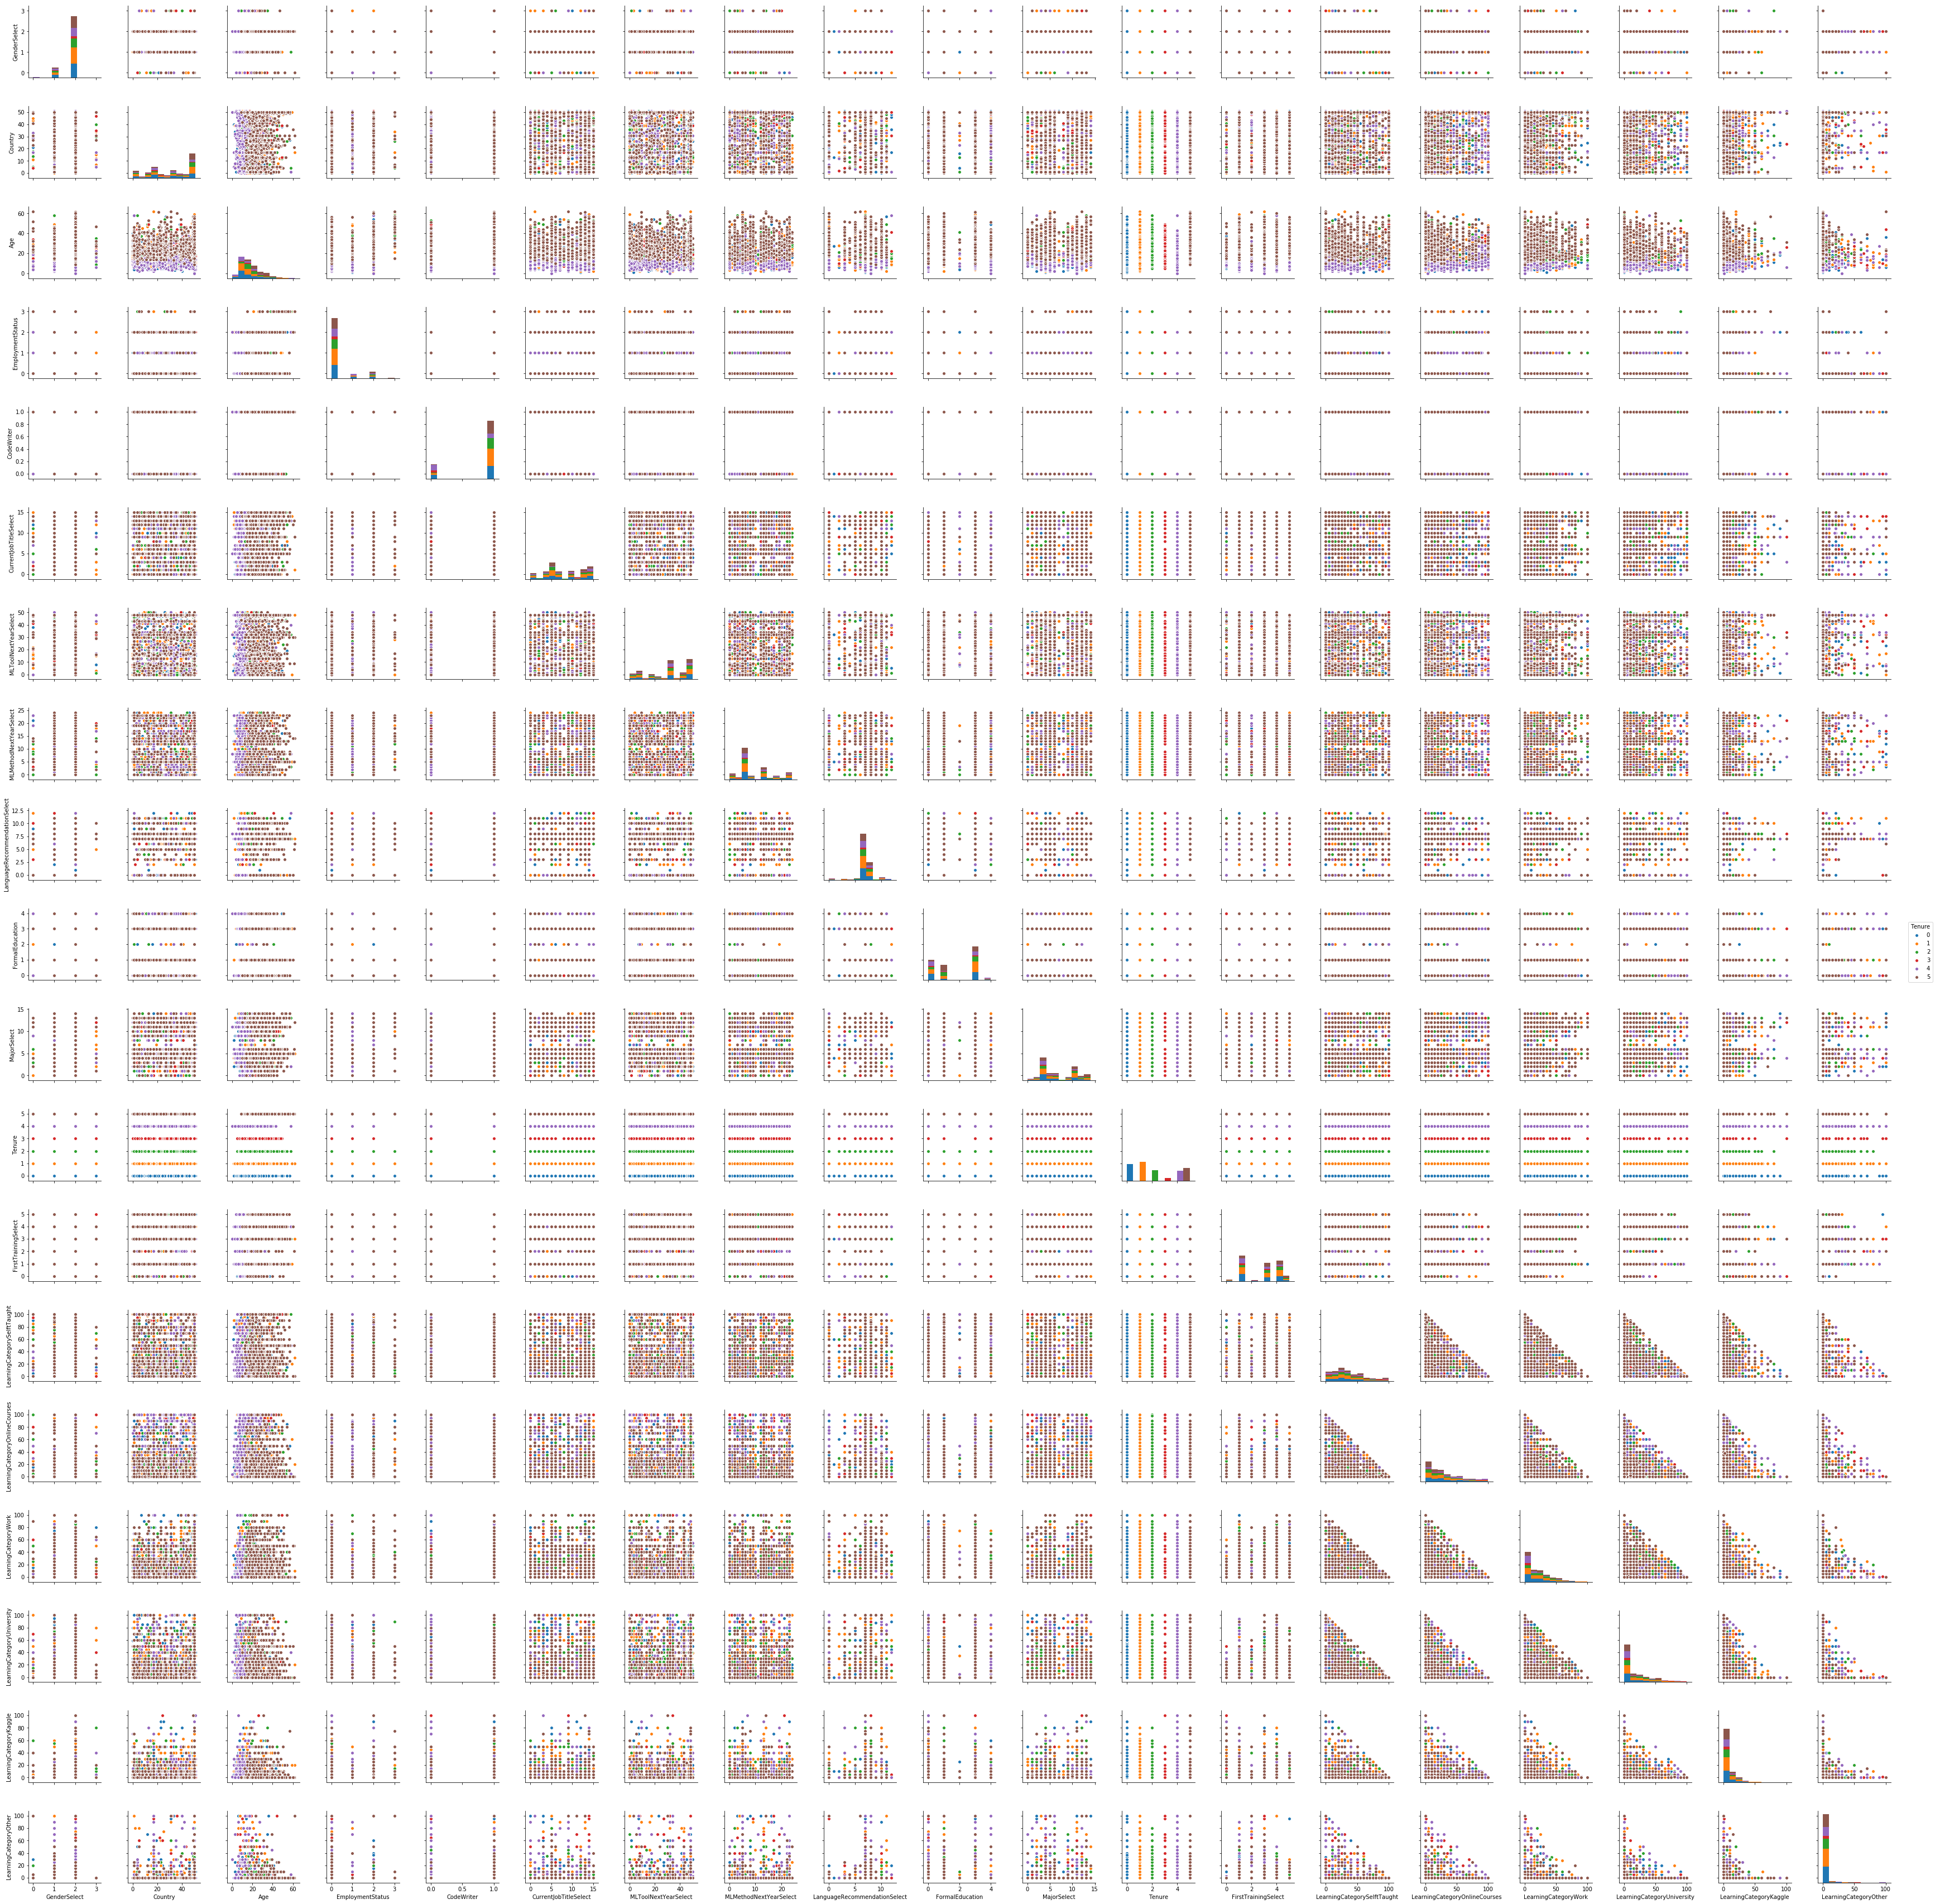

In [513]:
sns.pairplot(hue='Tenure', data=response_new)

In [487]:
cor = response_new.corr()
cor

LearningCategorySelftTaught  \
LearningCategorySelftTaught                       1.000000   
LearningCategoryOnlineCourses                    -0.391676   
LearningCategoryWork                             -0.257017   
LearningCategoryUniversity                       -0.346929   
LearningCategoryKaggle                           -0.124464   
LearningCategoryOther                            -0.098735   

                               LearningCategoryOnlineCourses  \
LearningCategorySelftTaught                        -0.391676   
LearningCategoryOnlineCourses                       1.000000   
LearningCategoryWork                               -0.323589   
LearningCategoryUniversity                         -0.372012   
LearningCategoryKaggle                             -0.071167   
LearningCategoryOther                              -0.085854   

                               LearningCategoryWork  \
LearningCategorySelftTaught               -0.257017   
LearningCategoryOnlineCourses             -0.323589   
LearningCategoryWork                       1.000000   
LearningCategoryUniversity                -0.105954   
LearningCategoryKaggle                    -0.117690   
LearningCategoryOther                     -0.078316   

                               LearningCategoryUniversity  \
LearningCategorySelftTaught                     -0.346929   
LearningCategoryOnlineCourses                   -0.372012   
LearningCategoryWork                            -0.105954   
LearningCategoryUniversity                       1.000000   
LearningCategoryKaggle                          -0.133029   
LearningCategoryOther                           -0.089657   

                               LearningCategoryKaggle  LearningCategoryOther  
LearningCategorySelftTaught                 -0.124464              -0.098735  
LearningCategoryOnlineCourses               -0.071167              -0.085854  
LearningCategoryWork                        -0.117690              -0.078316  
LearningCategoryUniversity                  -0.133029              -0.089657  
LearningCategoryKaggle                       1.000000              -0.044604  
LearningCategoryOther                       -0.044604               1.000000

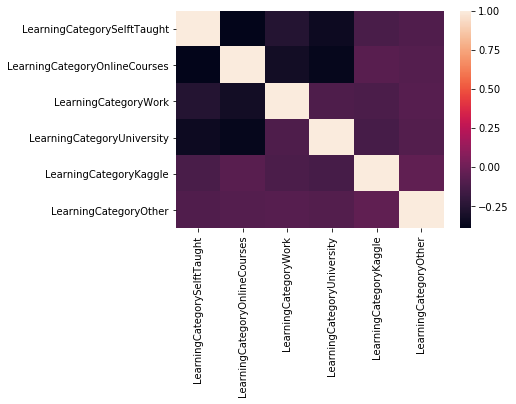

In [488]:
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns)

In [493]:
col = ['GenderSelect','Country','Age','EmploymentStatus','CodeWriter','Tenure','CurrentJobTitleSelect','MLToolNextYearSelect','MLMethodNextYearSelect','LanguageRecommendationSelect','FormalEducation','MajorSelect','FirstTrainingSelect']
response_new_cat = response

for i in col:
    response_new_cat[i] = response_new_cat[i].astype('category')
    response_new_cat[i] = response_new_cat[i].cat.codes
    
response_new_cat.head()

GenderSelect  Country  Age  EmploymentStatus  CodeWriter  \
3             2       50   40                 2           1   
4             2       46   22                 0           1   
5             2        4   30                 0           1   
6             2       50   19                 0           1   
7             1       17    6                 0           0   

   CurrentJobTitleSelect  MLToolNextYearSelect  MLMethodNextYearSelect  \
3                      8                    48                      13   
4                      1                    48                      22   
5                      5                    48                       8   
6                      1                    48                      22   
7                     14                     7                       5   

   LanguageRecommendationSelect  FormalEducation  MajorSelect  Tenure  \
3                             7                3           11       5   
4                             7                1            6       5   
5                             7                1            5       2   
6                             8                3            5       5   
7                            10                0            4       0   

   FirstTrainingSelect  LearningCategorySelftTaught  \
3                    4                         30.0   
4                    4                         60.0   
5                    1                         45.0   
6                    4                         40.0   
7                    4                          0.0   

   LearningCategoryOnlineCourses  LearningCategoryWork  \
3                            0.0                  40.0   
4                            5.0                   5.0   
5                           25.0                  20.0   
6                            0.0                   0.0   
7                           40.0                   0.0   

   LearningCategoryUniversity  LearningCategoryKaggle  LearningCategoryOther  
3                        30.0                     0.0                    0.0  
4                        30.0                     0.0                    0.0  
5                         0.0                    10.0                    0.0  
6                        50.0                    10.0                    0.0  
7                        50.0                    10.0                    0.0

In [494]:
cor_cat = response_new_cat.corr()
cor_cat

GenderSelect   Country       Age  \
GenderSelect                       1.000000 -0.059222  0.057670   
Country                           -0.059222  1.000000  0.119307   
Age                                0.057670  0.119307  1.000000   
EmploymentStatus                   0.000639 -0.014001  0.148635   
CodeWriter                        -0.001459  0.043929  0.069371   
CurrentJobTitleSelect              0.015101 -0.014503  0.046127   
MLToolNextYearSelect               0.017957 -0.011199 -0.015862   
MLMethodNextYearSelect            -0.025069  0.015271  0.019653   
LanguageRecommendationSelect      -0.003506 -0.003126  0.002234   
FormalEducation                   -0.026669  0.002574  0.061280   
MajorSelect                       -0.037466  0.026564  0.062007   
Tenure                             0.026944  0.062921  0.386783   
FirstTrainingSelect               -0.060211  0.061619  0.004848   
LearningCategorySelftTaught        0.064584  0.014258  0.091356   
LearningCategoryOnlineCourses      0.034460 -0.073699  0.000504   
LearningCategoryWork              -0.018422  0.049732  0.045363   
LearningCategoryUniversity        -0.108988  0.042891 -0.114229   
LearningCategoryKaggle             0.066929 -0.035710 -0.048978   
LearningCategoryOther             -0.047257  0.001268 -0.008760   

                               EmploymentStatus  CodeWriter  \
GenderSelect                           0.000639   -0.001459   
Country                               -0.014001    0.043929   
Age                                    0.148635    0.069371   
EmploymentStatus                       1.000000    0.003079   
CodeWriter                             0.003079    1.000000   
CurrentJobTitleSelect                  0.033825   -0.141354   
MLToolNextYearSelect                  -0.033856   -0.013620   
MLMethodNextYearSelect                 0.036384   -0.024071   
LanguageRecommendationSelect          -0.045179    0.054331   
FormalEducation                        0.026910    0.037693   
MajorSelect                            0.008526    0.065927   
Tenure                                 0.055497   -0.069601   
FirstTrainingSelect                   -0.023007    0.172661   
LearningCategorySelftTaught            0.033473    0.025268   
LearningCategoryOnlineCourses          0.018290   -0.256555   
LearningCategoryWork                  -0.048769    0.307621   
LearningCategoryUniversity            -0.010882    0.036725   
LearningCategoryKaggle                -0.003654   -0.018189   
LearningCategoryOther                 -0.010943   -0.058890   

                               CurrentJobTitleSelect  MLToolNextYearSelect  \
GenderSelect                                0.015101              0.017957   
Country                                    -0.014503             -0.011199   
Age                                         0.046127             -0.015862   
EmploymentStatus                            0.033825             -0.033856   
CodeWriter                                 -0.141354             -0.013620   
CurrentJobTitleSelect                       1.000000             -0.009143   
MLToolNextYearSelect                       -0.009143              1.000000   
MLMethodNextYearSelect                     -0.007133             -0.058029   
LanguageRecommendationSelect               -0.092291              0.056396   
FormalEducation                            -0.034310             -0.013680   
MajorSelect                                -0.034351             -0.007111   
Tenure                                      0.078433             -0.016432   
FirstTrainingSelect                        -0.013231             -0.029092   
LearningCategorySelftTaught                 0.063079             -0.022992   
LearningCategoryOnlineCourses               0.035063              0.043384   
LearningCategoryWork                       -0.109275             -0.005323   
LearningCategoryUniversity                 -0.007263             -0.019644   
LearningCategoryKaggle   

## Part B - Analyze Some Data

### What is expected?

From the survey data collected by Kaggle, We are going to determine the Tenure/Work experience of a Kaggle user. We will use the following machine learning techniques to determine which one would give better accuracy:

1. Logistic Regression
2. Linear Discriminant Analysis
3. K Neighbors Classifier

#### Logistic Regression

<p><strong>Logistic regression</strong>&nbsp;is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).</p>

<p><strong>In logistic regression, the dependent variable is binary or dichotomous, i.e. it only contains data coded as 1 (TRUE, success, pregnant, etc.) or 0 (FALSE, failure, non-pregnant, etc.).</strong></p>

<p>The goal of logistic regression is to find the best fitting (yet biologically reasonable) model to describe the relationship between the dichotomous characteristic of interest (dependent variable = response or outcome variable) and a set of independent (predictor or explanatory) variables. Logistic regression generates the coefficients (and its standard errors and significance levels) of a formula to predict a&nbsp;<em>logit transformation</em>&nbsp;of the probability of presence of the characteristic of interest:</p>

<p><img alt="Logistic regression equation" src="https://www.medcalc.org/manual/_help/formula/logist134.png" /></p>

<p>where p is the probability of presence of the characteristic of interest. The logit transformation is defined as the logged odds:</p>

<p><img alt="Odds=p/(1-p)" src="https://www.medcalc.org/manual/_help/formula/logist135.png" /></p>

<p>and</p>

<p><img alt="Logit(p)=ln(p/(1-p))" src="https://www.medcalc.org/manual/_help/formula/logist143.png" /></p>

<p>Rather than choosing parameters that minimize the sum of squared errors (like in ordinary regression), estimation in logistic regression chooses parameters that maximize the likelihood of observing the sample values.</p>


#### Linear Discriminant Analysis

<p><strong>Linear discriminant analysis</strong>&nbsp;(<strong>LDA</strong>) is a generalization of&nbsp;<strong>Fisher&#39;s linear discriminant</strong>, a method used in&nbsp;<a href="https://en.wikipedia.org/wiki/Statistics">statistics</a>,&nbsp;<a href="https://en.wikipedia.org/wiki/Pattern_recognition">pattern recognition</a>&nbsp;and&nbsp;<a href="https://en.wikipedia.org/wiki/Machine_learning">machine learning</a>&nbsp;to find a&nbsp;<a href="https://en.wikipedia.org/wiki/Linear_combination">linear combination</a>&nbsp;of&nbsp;<a href="https://en.wikipedia.org/wiki/Features_(pattern_recognition)">features</a>&nbsp;that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a&nbsp;<a href="https://en.wikipedia.org/wiki/Linear_classifier">linear classifier</a>, or, more commonly, for&nbsp;<a href="https://en.wikipedia.org/wiki/Dimensionality_reduction">dimensionality reduction</a>&nbsp;before later&nbsp;<a href="https://en.wikipedia.org/wiki/Statistical_classification">classification</a>.</p>


#### k-nearest neighbors algorithm

<p>In&nbsp;<a href="https://en.wikipedia.org/wiki/Pattern_recognition">pattern recognition</a>, the&nbsp;<strong><em>k</em>-nearest neighbors algorithm</strong>&nbsp;(<strong><em>k</em>-NN</strong>) is a&nbsp;<a href="https://en.wikipedia.org/wiki/Non-parametric_statistics">non-parametric</a>&nbsp;method used for&nbsp;<a href="https://en.wikipedia.org/wiki/Statistical_classification">classification</a>&nbsp;and&nbsp;<a href="https://en.wikipedia.org/wiki/Regression_analysis">regression</a>.<sup><a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#cite_note-1">[1]</a></sup>&nbsp;In both cases, the input consists of the&nbsp;<em>k</em>&nbsp;closest training examples in the&nbsp;<a href="https://en.wikipedia.org/wiki/Feature_space">feature space</a>. The output depends on whether&nbsp;<em>k</em>-NN is used for classification or regression:</p>

<ul>
	<li>In&nbsp;<em>k-NN classification</em>, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its&nbsp;<em>k</em>&nbsp;nearest neighbors (<em>k</em>&nbsp;is a positive&nbsp;<a href="https://en.wikipedia.org/wiki/Integer">integer</a>, typically small). If&nbsp;<em>k</em>&nbsp;=&nbsp;1, then the object is simply assigned to the class of that single nearest neighbor.</li>
</ul>

<ul>
	<li>In&nbsp;<em>k-NN regression</em>, the output is the property value for the object. This value is the average of the values of its&nbsp;<em>k</em>&nbsp;nearest neighbors.</li>
</ul>

<p><em>k</em>-NN is a type of&nbsp;<a href="https://en.wikipedia.org/wiki/Instance-based_learning">instance-based learning</a>, or&nbsp;<a href="https://en.wikipedia.org/wiki/Lazy_learning">lazy learning</a>, where the function is only approximated locally and all computation is deferred until classification. The&nbsp;<em>k</em>-NN algorithm is among the simplest of all&nbsp;<a href="https://en.wikipedia.org/wiki/Machine_learning">machine learning</a>&nbsp;algorithms.</p>


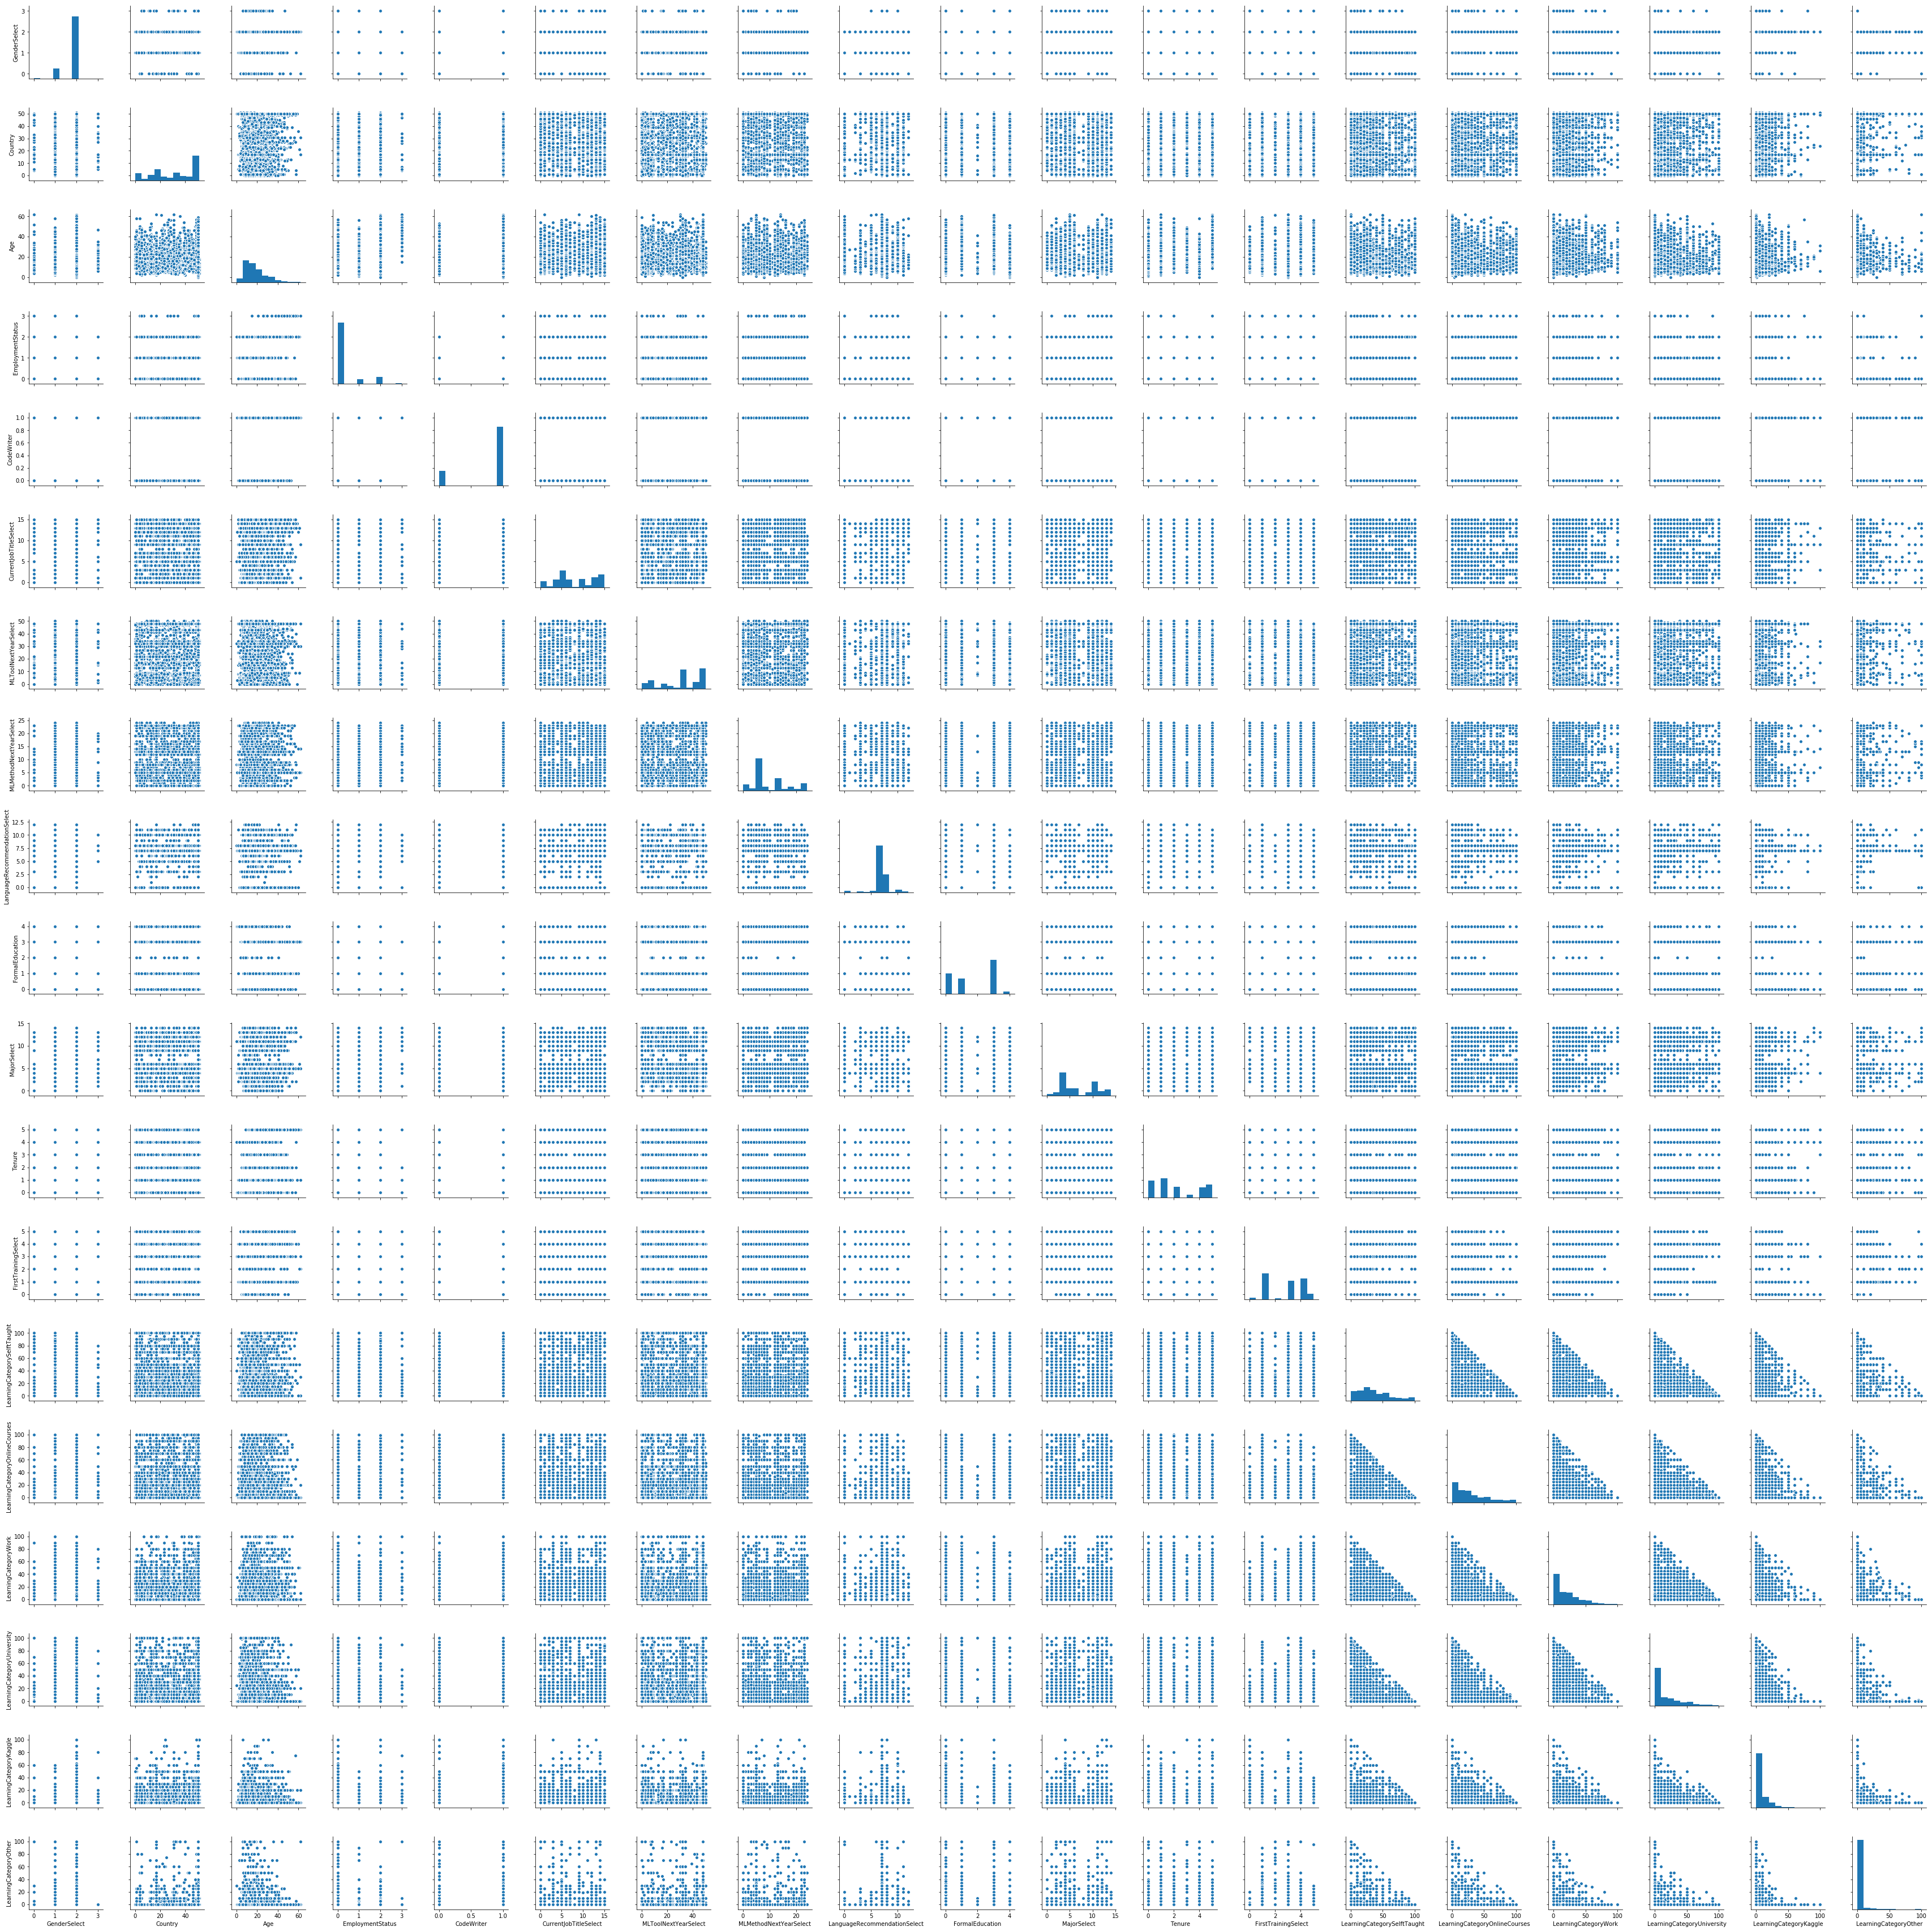

In [496]:
sns.pairplot(response_new)

### Dividing data into Training and Testin data

In [497]:
array = response_new.values
X = array[:,0:19]
Y = array[:,11]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [499]:
X

array([[ 2., 50., 40., ..., 30.,  0.,  0.],
       [ 2., 46., 22., ..., 30.,  0.,  0.],
       [ 2.,  4., 30., ...,  0., 10.,  0.],
       ...,
       [ 2., 23., 28., ..., 10.,  0.,  0.],
       [ 2., 25., 39., ...,  0.,  0.,  0.],
       [ 2., 18.,  9., ...,  0., 10.,  0.]])

In [500]:
seed = 10
scoring = 'accuracy'

In [519]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.812568 (0.010174)
LDA: 0.404285 (0.016380)
KNN: 0.336537 (0.014270)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.261527 (0.015158)


<p style="background-color:yellow">From the above we can conclude that Logistic Regression gives better accuracy for the given data set</p>

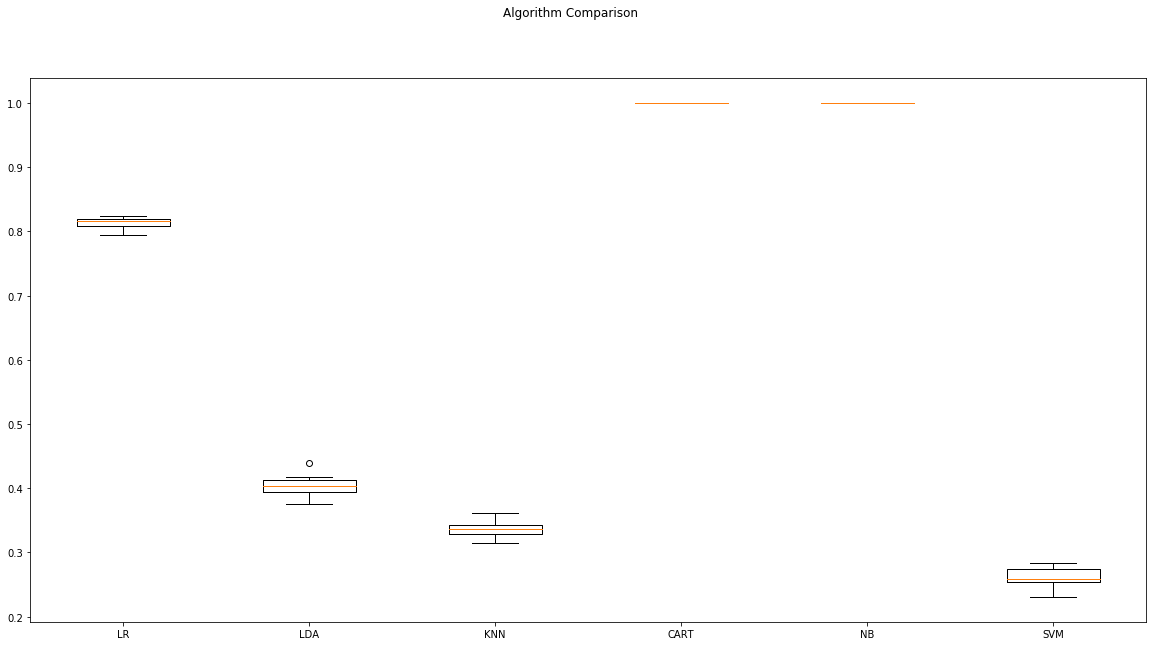

In [523]:
# Compare Algorithms
fig = plt.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### To determine the confusion matrix

In [522]:
# Make predictions on validation dataset
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print("accuracy_score")
print(accuracy_score(Y_validation, predictions))
print("confusion_matrix")
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

accuracy_score
0.8104575163398693
confusion_matrix
[[314   0   0   0   0   0]
 [  0 351   0   9   0   0]
 [  0 181  23   5   1   0]
 [  0   0   4  18  39   0]
 [  0   0  12  10 150   0]
 [  0   0   0   0   0 260]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       314
        1.0       0.66      0.97      0.79       360
        2.0       0.59      0.11      0.18       210
        3.0       0.43      0.30      0.35        61
        4.0       0.79      0.87      0.83       172
        5.0       1.00      1.00      1.00       260

avg / total       0.80      0.81      0.77      1377



# Conclusion

<p>From the constructed machine learning models. We can conclude that Logistic regression model gives us a better prediction into categorising the data into diffent tenure</p>

# References

<ul>
	<li><a href="https://www.kaggle.com/mhajabri/what-do-kagglers-say-about-data-science" target="_blank">https://www.kaggle.com/mhajabri/what-do-kagglers-say-about-data-science</a></li>
	<li><a href="https://www.kaggle.com/ash316/novice-to-grandmaster" target="_blank">https://www.kaggle.com/ash316/novice-to-grandmaster</a></li>
	<li><a href="https://www.kaggle.com/rounakbanik/data-science-faq" target="_blank">https://www.kaggle.com/rounakbanik/data-science-faq</a></li>
	<li><a href="https://www.medcalc.org/manual/logistic_regression.php" target="_blank">https://www.medcalc.org/manual/logistic_regression.php</a></li>
	<li><a href="https://en.wikipedia.org/wiki/Linear_discriminant_analysis" target="_blank">https://en.wikipedia.org/wiki/Linear_discriminant_analysis</a></li>
</ul>
